Polynomial reggression is concerned with only one variable and different order of that variable.

$ y = \beta_{0} + \beta_{1}X_{1} + \beta_{2}X_{1}^2 + ... + \beta_{n}X_{1}^n$

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib notebook - this line makes the plot interactive Good for zooming.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


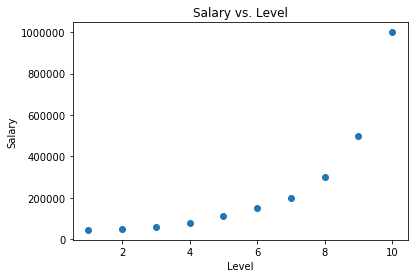

In [4]:
plt.scatter(dataset["Level"], dataset["Salary"])
plt.title("Salary vs. Level")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

The above graph will help guide us towards PLR.

In [5]:
X = dataset.iloc[:, 1:2].values

In [6]:
y = dataset.iloc[:, 2].values

In [7]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [8]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

We dont need the position column as it is equivalent to the level column (it's like we already encoded the data).

Note, we always want our X to be represented as a matrix, hence we put [:,1:2].values. This is equivalent to [:, 1].values but ensures it remains in matrix form instead of vector form.

Furthermore, since we have such a small amount of data, it makes now sense to split it into a test and training set. There is also no need for feature scaling here!

In [9]:
poly_reg = PolynomialFeatures(degree=5) # the defautlt is to features, that is, order/degree = 2

Later on, I will get into how to set the appropriate degree for models. For this example, a degree of 5 was more appropriate.

Ofcourse, we want to be cautious aout overfitting here. However, in this instance, since we have 'cooked' data, we know that it follows a perfect polynomial relationship and it seems that a degree of 5/6 fits it very well.

Later on, I wil discuss how to avoid overfitting.

In [10]:
X_poly = poly_reg.fit_transform(X)

In [11]:
pd.DataFrame(X_poly) #poly reg class automatically adds the column of ones in order to include the constant b0.

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0,32.0
2,1.0,3.0,9.0,27.0,81.0,243.0
3,1.0,4.0,16.0,64.0,256.0,1024.0
4,1.0,5.0,25.0,125.0,625.0,3125.0
5,1.0,6.0,36.0,216.0,1296.0,7776.0
6,1.0,7.0,49.0,343.0,2401.0,16807.0
7,1.0,8.0,64.0,512.0,4096.0,32768.0
8,1.0,9.0,81.0,729.0,6561.0,59049.0
9,1.0,10.0,100.0,1000.0,10000.0,100000.0


In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

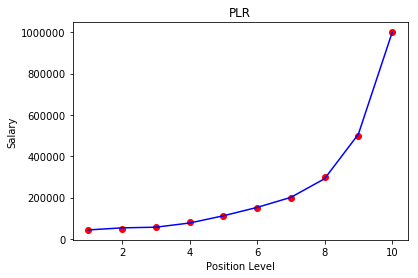

In [13]:
#visualize results.

plt.scatter (X, y, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title("PLR")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

Now, lets actually predict the salary using our model

In [14]:
lin_reg.predict(poly_reg.fit_transform(6.5))

array([ 174878.07765151])

A prediction of ~175K with degree 6. Note, this answer will change depending on the degree.

This concludes PLR.